### Imports

In [5]:
from loader import get_data
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
from stats import get_max_elapsed_time_distribution
from stats import get_max_accuracy_distribution

plt.rcParams['figure.figsize'] = (12.0, 8.0)

### If we keep only the users with always a good accuracy we lose a lot of data

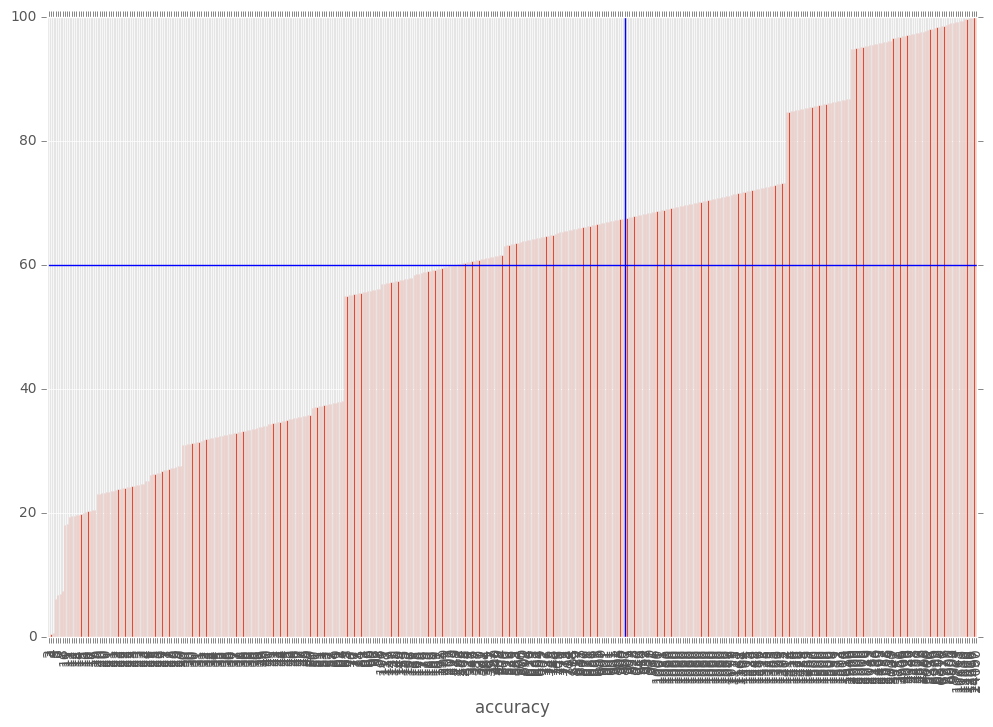

In [6]:
df = get_data()
# Get the accuracy max per user
max_accuracy_dist = get_max_accuracy_distribution(df).reset_index()
max_accuracy_dist.columns = ['accuracy', 'coverage']
ax = max_accuracy_dist.plot.bar(x='accuracy', y='coverage', legend=False)
ax.plot([249, 249], [0, 100], "b-")
ax.plot([0, 24000], [59.96, 59.96], "b-")
plt.show()

In [7]:
max_accuracy_dist[max_accuracy_dist.coverage <= 60].tail()

,accuracy,coverage
172,201,59.640523
173,207,59.722222
174,209,59.803922
175,210,59.885621
176,249,59.967320


### We could just remove only the low accuracy points

In [14]:
accuracy_dist = df.groupby("accuracy").size().cumsum()
accuracy_dist = (accuracy_dist * 100.0 / max(accuracy_dist)).reset_index()
accuracy_dist.columns = ['accuracy', 'coverage']
accuracy_dist.accuracy = accuracy_dist.accuracy.apply(round)

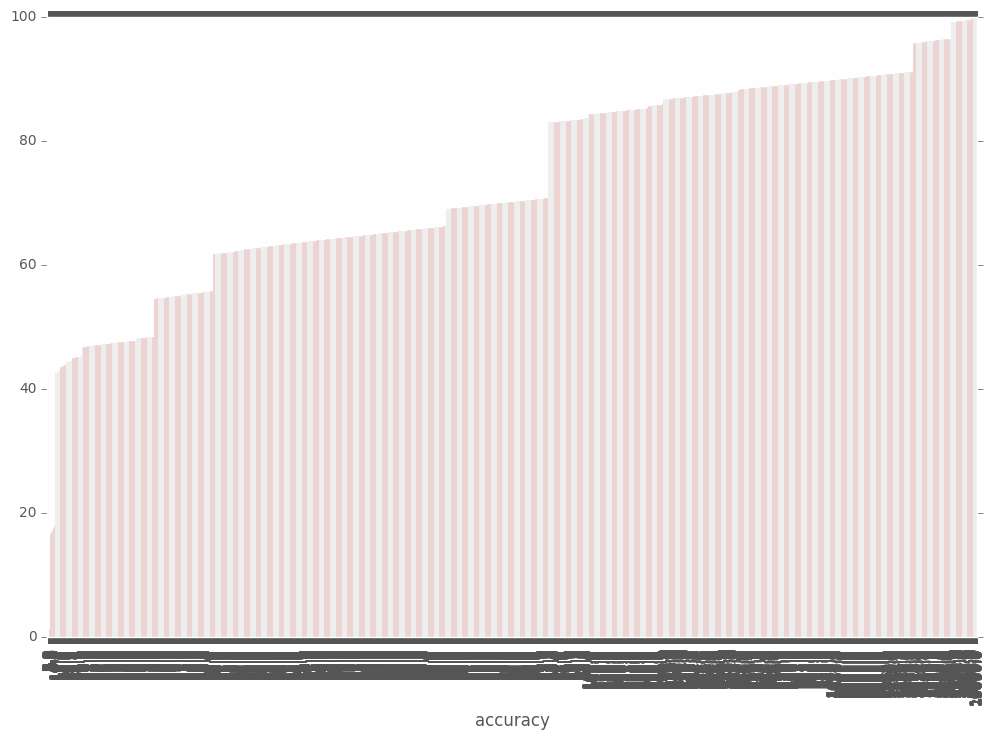

In [15]:
ax = accuracy_dist.plot.bar(x='accuracy', y='coverage', legend=False)
plt.show()

### With a proxomity of at least 50m we have almost 70% of the database

In [20]:
accuracy_dist[accuracy_dist.accuracy <= 50].tail()

,accuracy,coverage
3809,50.0,69.315405
3810,50.0,69.317023
3811,50.0,69.318641
3812,50.0,69.320260
3813,50.0,69.321878


### For a time series accuracy we use the elapsed time between two observations

In [25]:
elapsed_time_dist = get_max_elapsed_time_distribution(df).reset_index()
elapsed_time_dist.columns = ['elapsed_time', 'coverage']

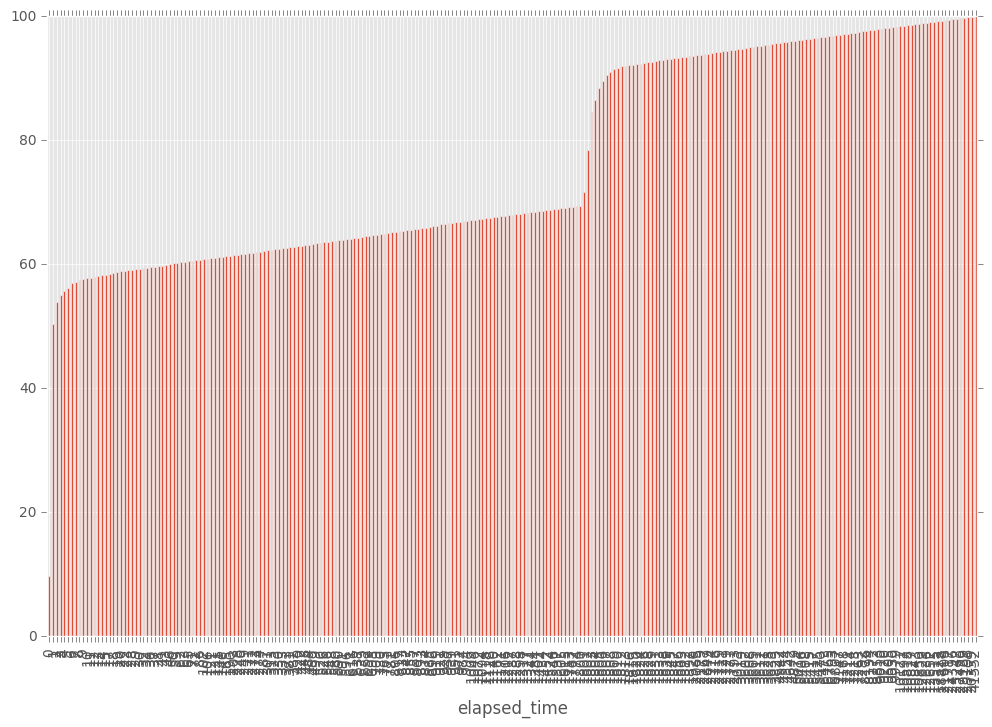

In [26]:
ax = elapsed_time_dist.plot.bar(x='elapsed_time', y='coverage', legend=False)
plt.show()

### With time series without any elapsed time superior to 1min we cover 60% of the database

In [30]:
elapsed_time_dist[elapsed_time_dist.coverage <= 60].tail()

,elapsed_time,coverage
27,36,59.558824
28,37,59.640523
29,38,59.722222
30,41,59.803922
31,43,59.967320
